# We are trying to create a LangGraph automation flow without the use of an LLM. 

In [1]:
# 
from langgraph.graph import StateGraph, START, END

# Required for the state so that the values of the key value pair can be strongly typed
from typing import TypedDict

In [2]:
# For graphical visualization of the state graph
 
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 1. Define the state (memory passed between nodes)

In [3]:
# Here we define a state to be passed amongst the nodes to read and modify. The nodes are only allowed to pass on this state amongst themself.
class BMI_state(TypedDict):
    Height: float
    Weight: float
    BMI : float

### 2. Define graph nodes (Functions)

In [4]:
def bmi_calculator(state: BMI_state) -> BMI_state:
    state["BMI"] = round(state["Weight"]/(state["Height"]**2), 2)
    return state

### 3. Declare the graph

In [5]:
# The StateGraph class of the langgraph.graph
graph = StateGraph(BMI_state)

### 4. Add nodes to the graph

In [6]:
graph.add_node("calculate_bmi", bmi_calculator)

### 5. Add edges to the graph

In [7]:
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", END)

### 6. Compile the graph

In [8]:
app = graph.compile()

### 7. Visualise graph

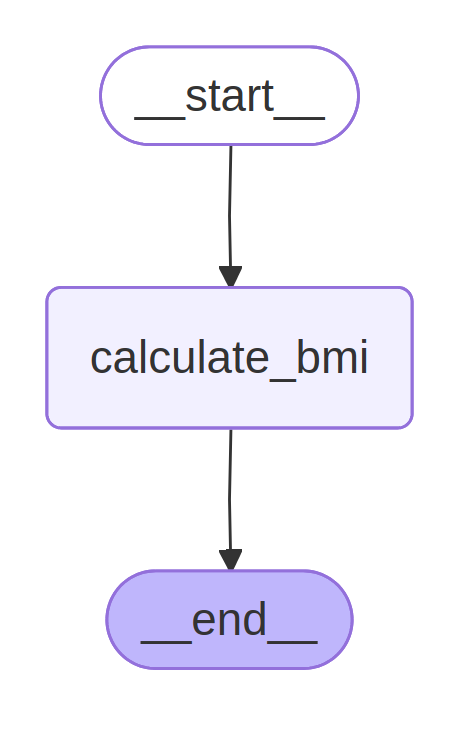

In [9]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))

### 8. Run the graph

In [10]:
if __name__ == "__main__":
    inputs = {"Weight": 99, "Height": 1.80}
    output_state = app.invoke(inputs)
    
    print(output_state)
    

{'Height': 1.8, 'Weight': 99, 'BMI': 30.56}
